In [27]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
path = '../datasets/whr2017.csv'
df = pd.read_csv(path)
df.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [29]:
df.columns

Index(['country', 'rank', 'score', 'high', 'low', 'gdp', 'family', 'lifexp',
       'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [30]:
X = df[['gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia']]
y = df['score']
print(X.shape)
print(y.shape)

(155, 7)
(155,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Regresion lineal

In [32]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)
model_LR_predict = model_LR.predict(X_test)

### Regularización Lasso
Tambien llamada L1
* Penaliza a los feature que aportan poca informacion **volviendolos cero**, eliminando el ruido que producen en el modelo.
$$ 
\hat\beta = \text{arg min}_\beta \sum_{i=1}^n \left(  y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^p |\beta_j|
$$
El ultimo termino es el penalizado.
Reduce la complejidad de la red al extraer solo las características más importantes. Esto se realiza disminuyendo los pesos de las variables de entrada que no aportan significancia.
$$
L_1(X,w) = L(X,w) + \lambda\sum |w_i|
$$
* Penalia la suma de los valores absolutos de los pesos.
* Genera un modelo más simple e interpretable.
* Es robusto a los outliers.

In [33]:
model_Lasso = Lasso(alpha=0.02)
model_Lasso.fit(X_train,y_train)
model_Lasso_predict = model_Lasso.predict(X_test)

## Regularización Ridge
También llamada L2
* Penalisa los features pocos relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.
$$ 
\hat\beta = \text{arg min}_\beta \sum_{i=1}^n \left(  y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^p \beta_j^2
$$
Permite indentificar patrones complejos y correlaciones entre variables. Esto podría aprovecharse al usar una sol variable para explicar el comportamiento de otras.
$$
L_1(X,w) = L(X,w) + \lambda\sum w_i^2
$$
* Penaliza la suma de los cuadrados de los valores de los pesos. El parámetro $\lambda$ suele ser pequeño.
* Útil para aprender patrones complejos de los datos
* No es robusto a outliers.

In [34]:
model_Ridge = Ridge(alpha=1)
model_Ridge.fit(X_train,y_train)
model_Ridge_predict = model_Ridge.predict(X_test)

In [35]:
print('MSE Linear Regresion = {}'.format(mean_squared_error(model_LR_predict, y_test)))
print('MSE Lasso = {}'.format(mean_squared_error(model_Lasso_predict, y_test)))
print('MSE Ridge = {}'.format(mean_squared_error(model_Ridge_predict, y_test)))

MSE Linear Regresion = 1.0933184789546134e-07
MSE Lasso = 0.08469479127669341
MSE Ridge = 0.012764416179374889


In [36]:
print('Coeficientes LR = {}'.format(model_LR.coef_))
print('Coeficientes Lasso = {}'.format(model_Lasso.coef_))
print('Coeficientes Ridge = {}'.format(model_Ridge.coef_))

Coeficientes LR = [1.00004926 0.99983929 1.00009709 0.99996109 0.9997121  1.00022773
 0.99995736]
Coeficientes Lasso = [1.2243503  0.81721874 0.57472991 0.74815571 0.         0.10322193
 0.87707642]
Coeficientes Ridge = [1.06495173 0.93255245 0.87462553 0.89616851 0.5394427  0.73333021
 0.95430803]


## Regularización ElasticNet
La función de perdida del ElasticNet implementa L1 y L2. 

![](https://lh4.googleusercontent.com/xCmnejMCrBMLfAji7sFlvz_VPT-wrJ5v0NAd5CWgMuG-Qu5EMXQ6pPWR3RQDv2A1jGECWZesv7rrnyhdIcnfISvdB0RY8KjVntDdjpG3aRIMWMX8nqNl_M5sk1yfOtgYXHeQuo26)

Donde tenemos ahora un parámetro adicional 𝛂 que tiene un rango de valores entre 0 y 1. Si 𝛂 = 0 , ElasticNet se comportará como Ridge, y si 𝛂 = 1 , se comportará como Lasso. Por lo tanto, nos brinda todo el espectro lineal de posibles combinaciones entre estos dos extremos.

In [37]:
from sklearn.linear_model import ElasticNet
import numpy as np
import matplotlib.pyplot as plt

def modelElastic(alpha=1):
    modelElastic= ElasticNet(random_state=0, alpha=alpha)
    modelElastic.fit(X_train, y_train)
    y_predic_elastic=modelElastic.predict(X_test)
    # loss function
    elastic_loss = mean_squared_error(y_test, y_predic_elastic)
    return elastic_loss

C:\Users\daniel\AppData\Local\Temp/ipykernel_1852/221361236.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  modelElastic.fit(X_train, y_train)
c:\Users\daniel\Desktop\practica\sklearn\sklearnenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


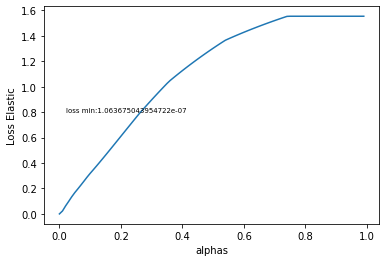

In [38]:
alphas = np.arange(0,1,0.01)
loss_total = []
for i in alphas:
    res = modelElastic(i)
    loss_total.append(res)
loss_total = np.array(loss_total)

plt.plot(alphas,loss_total)
plt.xlabel('alphas')
plt.ylabel('Loss Elastic')
plt.text(0.02, 0.8, 'loss min:{}'.format(np.min(loss_total)), fontsize=7)
plt.show()

Notamos que como nos dice la teoria, si $\alpha$ = 0 se comporta como Ridge y tiene una mejor predicción